# Livestock Theft
In remote Indian villages, cattle or livestock theft, such
as cattle lifting or raiding, is rampant. Villagers are vigilant during the day, but most robberies occur at night
when the environment is poorly lit due to intermittent
power outages. After receiving numerous complaints
from villagers, the officials have installed few battery
powered CCTV cameras spread across places. Even after observing those CCTV footage for a week, the blind
officials denied possibility of any theft. Villagers argued,
pleaded those official babus but it was all in-vein. Only
when a ray of light attempts to pierce this darkness, the
real investigation unfolds. So, the dejected illiterate villagers with ill-lit lantern and a dark CCTV image need an image enhancing algorithm.


In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

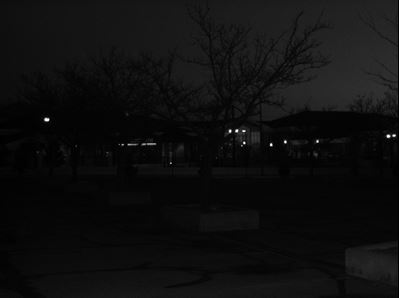

In [11]:
path = '/content/thief.JPG'
img = cv2.imread(path)
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

In [12]:
def histogram(path):
  """function to calculate the histogram of an image"""
  img = cv2.imread(path)
  gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  size = gray_img.shape
  hist_map = np.zeros((256))
  num=0
  for i in range(0,size[0]):
    for j in range(0,size[1]):
      hist_map[gray_img[i][j]]+=1
  return hist_map

In [13]:
def new_hist(path):
  """funtion to map original intensities to enhanced intensities"""
  hist_map = histogram(path)
  img = cv2.imread(path)
  gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  size = gray_img.shape
  for i in range(1,256):
    hist_map[i]+=hist_map[i-1]
  for i in range(0,256):
    hist_map[i] = (float(hist_map[i])/float(size[0]*size[1]))*255
  return hist_map

In [14]:
def out_img(path):
  """histogram equalization function"""
  img = cv2.imread(path)
  gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  size = gray_img.shape
  hist_map = new_hist(path)
  for i in range(0,size[0]):
    for j in range(0,size[1]):
      gray_img[i,j]=int(hist_map[gray_img[i][j]])
  return gray_img

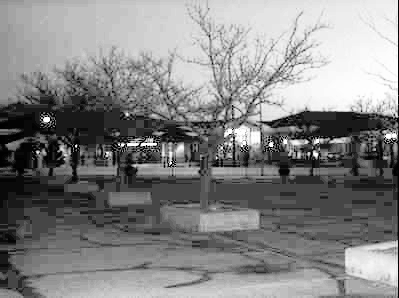

In [15]:
out = out_img(path)
plt.imsave('enhanced_image.jpg', out)
cv2_imshow(out)